### 0. Imports

In [3]:
import scanpy as sc
from spatial_tools import read_seqfish
from spatial_tools.graph import spatial_connectivity, cluster_centrality_scores, plot_cluster_centrality_scores

%load_ext autoreload
%autoreload 2
%load_ext lab_black

# A. seqFISH

In [4]:
BASE_PATH = 'path'

### 1. Build spatial graphs

In [5]:
adata_ob = read_seqfish(BASE_PATH, "ob")
adata_svz = read_seqfish(BASE_PATH, "svz")
adata_ob

C:\Users\anna-\Anaconda3\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2050 × 10000
    obs: 'index', 'louvain', 'Field of View', 'Cell ID', 'X', 'Y'
    obsm: 'spatial'

In [6]:
adata_svz_5 = adata_svz[adata_svz.obs["Field of View"] == 5].copy()

In [7]:
# use number of neighbors
spatial_connectivity(adata_svz_5, n_neigh=10, coord_type='seqfish')

### 2. Calculate centrality scores

In [8]:
cluster_centrality_scores( 
    adata = adata_svz_5,
    connectivity_key = 'spatial_connectivity',
    clusters_key = 'louvain',
    save_networkx_graph = True
)

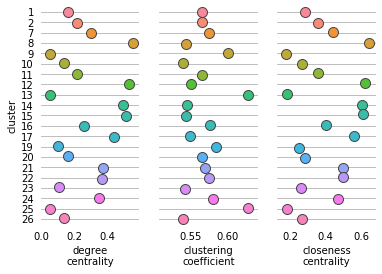

In [9]:
plot_cluster_centrality_scores(
    adata=adata_svz_5,
    centrality_scores_key='cluster_centrality_scores'
)

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Users\anna-\Anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\tools\_umap.py:147: FutureWarning: This locat

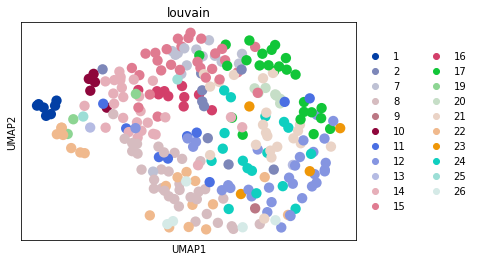

In [10]:
sc.pp.neighbors(adata_svz_5)
sc.tl.umap(adata_svz_5)
sc.pl.umap(adata_svz_5, color='louvain')

# B. Visium

In [11]:
dataset_name = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"
dataset_folder = "path"

In [12]:
adata = sc.read_visium(dataset_folder, count_file=f"{dataset_name}_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [13]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [14]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\tools\_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\tools\_leiden.py:111: FutureWarning: T

In [15]:
spatial_connectivity(adata, obsm='X_spatial', n_degree=1)

C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\neighbors\__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\tools\_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),
C:\Users\anna-\Anaconda3\lib\site-packages\scanpy\tools\_louvain.py:107: FutureWarning: 

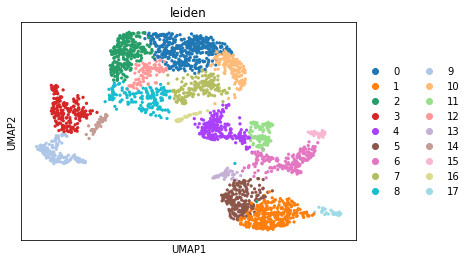

In [16]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.louvain(adata)
sc.pl.umap(adata, color='leiden')

In [17]:
cluster_centrality_scores( 
    adata = adata,
    connectivity_key = 'spatial_connectivity',
    clusters_key = 'leiden',
    save_networkx_graph = True
)

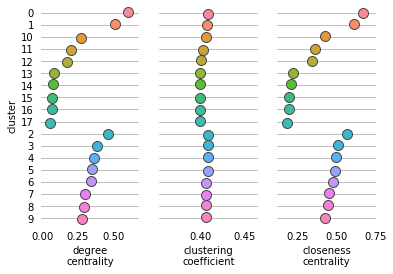

In [19]:
plot_cluster_centrality_scores(
    adata=adata,
    centrality_scores_key='cluster_centrality_scores'
)